# IMPORTING THE LIBRARIES

In [1]:
!pip install statsmodels


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.probability import FreqDist

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Zyla\Zyla_reviews_1.csv") #reading the csv file

# DATA CLEANING

In [4]:
df.head() #top 5 datasets

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,0,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,https://play-lh.googleusercontent.com/a/AAcHTt...,Zyla helped me a lot in my overall health and ...,0.998924,1,v5.0.0,09-07-2023 06:27,Thank you so much for your kind and encouragin...,23-07-2023 16:20,v5.0.0,POSITIVE
1,1,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,https://play-lh.googleusercontent.com/a/AAcHTt...,Very good app. Very good team who is always th...,0.998908,0,v5.0.0,08-07-2023 16:31,"Thank you so much for the kind words, Mr. Maha...",23-07-2023 16:15,v5.0.0,POSITIVE
2,2,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,https://play-lh.googleusercontent.com/a/AAcHTt...,It is an excellent app which I used for my mot...,0.998922,0,v5.0.0,05-07-2023 06:51,"Dear Mr. Mishra, we are pleased to hear that y...",06-07-2023 05:38,v5.0.0,POSITIVE
3,3,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,https://play-lh.googleusercontent.com/a-/AD_cM...,It's a delightful experience.. didn't know tel...,0.998867,0,v4.4.2,31-05-2023 09:18,"Dear Mr. Darne, thank you for your kind words,...",17-06-2023 07:05,v4.4.2,POSITIVE
4,4,e4d35f81-6717-441a-b694-c407f4389f2f,Muzzamil Hussain,https://play-lh.googleusercontent.com/a/AAcHTt...,Zyla aap is very good as they are giving us re...,0.998887,0,v4.4.2,30-05-2023 16:24,"Dear Mr. Hussain, we are glad to hear that you...",17-06-2023 06:57,v4.4.2,POSITIVE


In [5]:
df.isnull().values.any() #checking if any null value exist

True

In [6]:
df.isnull().sum() # sum of null values in column

Unnamed: 0               0
reviewId                 0
userName                 0
userImage                0
content                  0
score                    0
thumbsUpCount            0
reviewCreatedVersion    84
at                       0
replyContent             2
repliedAt                2
appVersion              84
sentiment                0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,0,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,https://play-lh.googleusercontent.com/a/AAcHTt...,Zyla helped me a lot in my overall health and ...,0.998924,1,v5.0.0,09-07-2023 06:27,Thank you so much for your kind and encouragin...,23-07-2023 16:20,v5.0.0,POSITIVE
1,1,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,https://play-lh.googleusercontent.com/a/AAcHTt...,Very good app. Very good team who is always th...,0.998908,0,v5.0.0,08-07-2023 16:31,"Thank you so much for the kind words, Mr. Maha...",23-07-2023 16:15,v5.0.0,POSITIVE
2,2,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,https://play-lh.googleusercontent.com/a/AAcHTt...,It is an excellent app which I used for my mot...,0.998922,0,v5.0.0,05-07-2023 06:51,"Dear Mr. Mishra, we are pleased to hear that y...",06-07-2023 05:38,v5.0.0,POSITIVE
3,3,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,https://play-lh.googleusercontent.com/a-/AD_cM...,It's a delightful experience.. didn't know tel...,0.998867,0,v4.4.2,31-05-2023 09:18,"Dear Mr. Darne, thank you for your kind words,...",17-06-2023 07:05,v4.4.2,POSITIVE
4,4,e4d35f81-6717-441a-b694-c407f4389f2f,Muzzamil Hussain,https://play-lh.googleusercontent.com/a/AAcHTt...,Zyla aap is very good as they are giving us re...,0.998887,0,v4.4.2,30-05-2023 16:24,"Dear Mr. Hussain, we are glad to hear that you...",17-06-2023 06:57,v4.4.2,POSITIVE


In [9]:
df.tail()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
1371,1371,b3c53cd7-b619-4ed7-a2da-9379aca4de33,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Fantastic,0.998407,6,v1.0.16,27-09-2018 13:51,Thank you for your review and encouragement! W...,16-11-2018 07:11,v1.0.16,POSITIVE
1372,1372,6fb9162a-5319-49c4-baf2-41dc0f0f80a6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"User friendly, easy to use & follow, designed ...",0.998896,6,v1.0.14,21-09-2018 15:05,Dear Mr Nanda - It has been such a pleasure fo...,16-11-2018 07:14,v1.0.14,POSITIVE
1373,1373,6409a85b-bc84-4d23-94fa-53430e365eba,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This is an amazing app, a true companion, guid...",0.998932,6,v1.0.13,14-09-2018 10:15,Dear Mr Dutta - Thank you for your positive wo...,16-11-2018 07:17,v1.0.13,POSITIVE
1374,1374,5822294c-b4c5-4480-bbb0-c6e4029486ad,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It is a best care taker, friend and guide.",0.998872,6,v1.0.13,13-09-2018 10:39,"Thank you for your kind words, we strive to im...",16-11-2018 07:21,v1.0.13,POSITIVE
1375,1375,ec85e3a6-b36d-429a-83e3-f1d635faad67,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great app. Easy to use and follow.,0.998888,5,v1.0.13,13-09-2018 07:03,"Thank you for your kind words, we strive to im...",16-11-2018 07:21,v1.0.13,POSITIVE


In [10]:
df.isnull().sum()

Unnamed: 0               0
reviewId                 0
userName                 0
userImage                0
content                  0
score                    0
thumbsUpCount            0
reviewCreatedVersion    84
at                       0
replyContent             2
repliedAt                2
appVersion              84
sentiment                0
dtype: int64

In [11]:
df['appVersion'].fillna(method='ffill', inplace=True)
df['reviewCreatedVersion'].fillna(method='ffill', inplace=True)


In [12]:
df.head(30)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,0,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,https://play-lh.googleusercontent.com/a/AAcHTt...,Zyla helped me a lot in my overall health and ...,0.998924,1,v5.0.0,09-07-2023 06:27,Thank you so much for your kind and encouragin...,23-07-2023 16:20,v5.0.0,POSITIVE
1,1,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,https://play-lh.googleusercontent.com/a/AAcHTt...,Very good app. Very good team who is always th...,0.998908,0,v5.0.0,08-07-2023 16:31,"Thank you so much for the kind words, Mr. Maha...",23-07-2023 16:15,v5.0.0,POSITIVE
2,2,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,https://play-lh.googleusercontent.com/a/AAcHTt...,It is an excellent app which I used for my mot...,0.998922,0,v5.0.0,05-07-2023 06:51,"Dear Mr. Mishra, we are pleased to hear that y...",06-07-2023 05:38,v5.0.0,POSITIVE
3,3,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,https://play-lh.googleusercontent.com/a-/AD_cM...,It's a delightful experience.. didn't know tel...,0.998867,0,v4.4.2,31-05-2023 09:18,"Dear Mr. Darne, thank you for your kind words,...",17-06-2023 07:05,v4.4.2,POSITIVE
4,4,e4d35f81-6717-441a-b694-c407f4389f2f,Muzzamil Hussain,https://play-lh.googleusercontent.com/a/AAcHTt...,Zyla aap is very good as they are giving us re...,0.998887,0,v4.4.2,30-05-2023 16:24,"Dear Mr. Hussain, we are glad to hear that you...",17-06-2023 06:57,v4.4.2,POSITIVE
5,5,d3242769-d6ea-46fe-ab03-978ca2787926,Adulkars Study Tec.,https://play-lh.googleusercontent.com/a-/AD_cM...,nice ap with excelent support,0.998885,0,v4.4.2,28-05-2023 11:47,"Dear Mr. Adulkar, we are truly humbled by your...",17-06-2023 06:51,v4.4.2,POSITIVE
6,6,90d8ad00-7894-44fd-b891-905f1358e90f,Ravikant Udeniya,https://play-lh.googleusercontent.com/a/AAcHTt...,Naice app,0.982733,0,v4.4.2,11-05-2023 17:45,"Dear Mr. Udeniya, thank you so much for your 5...",17-05-2023 06:02,v4.4.2,POSITIVE
7,7,b44df211-24d6-403a-8f4e-540fc148e664,MANGESH DESHPANDE,https://play-lh.googleusercontent.com/a-/AD_cM...,Wow,0.996380,0,v4.4.2,11-05-2023 01:02,Thank you for your positive review Mr. Deshpan...,17-05-2023 06:08,v4.4.2,POSITIVE
8,8,65cd0b5d-324a-4ae6-ae5c-339093c75826,NAZEER MOHAMMAD,https://play-lh.googleusercontent.com/a/AAcHTt...,Good to choose zyla health annual plans and su...,0.998642,0,v4.4.1,10-05-2023 09:06,"Dear Mr. Mohammad, thank you for sharing a 5-s...",17-05-2023 06:19,v4.4.1,POSITIVE
9,9,e084ee1d-f5d4-4cb3-bef9-d71500e3b2b3,Rajendra Doshi,https://play-lh.googleusercontent.com/a-/AD_cM...,Nice one to manage and control,0.998859,0,v4.4.1,05-05-2023 03:51,"Thank you for your kind review, Mr. Doshi. We ...",10-05-2023 05:16,v4.4.1,POSITIVE


In [13]:
df.rename(columns = {'at':'date'}, inplace =True) #renaming the "at" column with "date"


In [14]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth' , None)


In [15]:
df.drop(['userImage'],axis=1,inplace=True) #dropping userimage column

In [16]:
df

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion,sentiment
0,0,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.,0.998924,1,v5.0.0,09-07-2023 06:27,"Thank you so much for your kind and encouraging words Mr. Batra, The entire Zyla team is happy that we are able to motivate and guide you to follow a healthy lifestyle and bring a positive change in your health. We promise to keep enhancing your experience with us by sharing real-time guidance over diet, exercise & medication. Regards, Team Zyla :)",23-07-2023 16:20,v5.0.0,POSITIVE
1,1,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,Very good app. Very good team who is always there to support,0.998908,0,v5.0.0,08-07-2023 16:31,"Thank you so much for the kind words, Mr. Mahapatra, I hope our real-time and easy-to-follow guidance are helping you take better care of your health. We assure to keep providing you high quality medical guidance and personalized assistance over nutrition and exercise to boost your health further. Keep supporting us. Warm regards, Team Zyla :)",23-07-2023 16:15,v5.0.0,POSITIVE
2,2,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.,0.998922,0,v5.0.0,05-07-2023 06:51,"Dear Mr. Mishra, we are pleased to hear that you are satisfied with the care provided by the Zyla team. Happy to know that our health management app is useful in keeping better track of your mother's health. We will ensure real-time and personalized assistance on diet and exercise to bring a positive change in her health. Warm regards, Team Zyla :)",06-07-2023 05:38,v5.0.0,POSITIVE
3,3,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,It's a delightful experience.. didn't know tele medicine would be such fun.,0.998867,0,v4.4.2,31-05-2023 09:18,"Dear Mr. Darne, thank you for your kind words, we are glad that you are benefitting from our AI-empowered health management app. Our team is available for you 24 x 7 to work on your health and give you the most personalized and real-time guidance so that we can achieve great health outcomes together. Warm Regards, Team Zyla :)",17-06-2023 07:05,v4.4.2,POSITIVE
4,4,e4d35f81-6717-441a-b694-c407f4389f2f,Muzzamil Hussain,Zyla aap is very good as they are giving us reminder every time about the health and the diet Thank for calling us every time and giving the information about what to do or not,0.998887,0,v4.4.2,30-05-2023 16:24,"Dear Mr. Hussain, we are glad to hear that you are satisfied with the guidance provided by the Zyla team. Happy to know that regular follow-ups by our team are helping you take better care of your health. We will continue to share personalized assistance over diet and exercise along with effective home remedies. Best Regards, Team Zyla :)",17-06-2023 06:57,v4.4.2,POSITIVE
5,5,d3242769-d6ea-46fe-ab03-978ca2787926,Adulkars Study Tec.,nice ap with excelent support,0.998885,0,v4.4.2,28-05-2023 11:47,"Dear Mr. Adulkar, we are truly humbled by your kind words. Thank you so much for entrusting us and giving us the opportunity to support you in your health journey. Our team is available for you round the clock in order to provide you with the highest standards of care for the betterment of your health. Keep supporting us. Best regards, Team Zyla :)",17-06-2023 06:51,v4.4.2,POSITIVE
6,6,90d8ad00-7894-44fd-b891-905f1358e90f,Ravikant Udeniya,Naice app,0.982733,0,v4.4.2,11-05-2023 17:45,"Dear Mr. Udeniya, thank you so much for your 5-star rating and positive feedback. We take pride in knowing that you are satisfied with your health journey with us. We promise to 

In [17]:
df['date'].dtype #converting string to date

dtype('O')

In [18]:
df.to_excel(r'C:\Users\Lenovo\Downloads\Zyla\Zyla_reviews_2.xlsx', index=False)



In [19]:
#df.isnull().sum()

# Loading data with parse dates

In [20]:
df2 = pd.DataFrame(df)


In [21]:
df2.head()

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion,sentiment
0,0,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.,0.998924,1,v5.0.0,09-07-2023 06:27,"Thank you so much for your kind and encouraging words Mr. Batra, The entire Zyla team is happy that we are able to motivate and guide you to follow a healthy lifestyle and bring a positive change in your health. We promise to keep enhancing your experience with us by sharing real-time guidance over diet, exercise & medication. Regards, Team Zyla :)",23-07-2023 16:20,v5.0.0,POSITIVE
1,1,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,Very good app. Very good team who is always there to support,0.998908,0,v5.0.0,08-07-2023 16:31,"Thank you so much for the kind words, Mr. Mahapatra, I hope our real-time and easy-to-follow guidance are helping you take better care of your health. We assure to keep providing you high quality medical guidance and personalized assistance over nutrition and exercise to boost your health further. Keep supporting us. Warm regards, Team Zyla :)",23-07-2023 16:15,v5.0.0,POSITIVE
2,2,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.,0.998922,0,v5.0.0,05-07-2023 06:51,"Dear Mr. Mishra, we are pleased to hear that you are satisfied with the care provided by the Zyla team. Happy to know that our health management app is useful in keeping better track of your mother's health. We will ensure real-time and personalized assistance on diet and exercise to bring a positive change in her health. Warm regards, Team Zyla :)",06-07-2023 05:38,v5.0.0,POSITIVE
3,3,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,It's a delightful experience.. didn't know tele medicine would be such fun.,0.998867,0,v4.4.2,31-05-2023 09:18,"Dear Mr. Darne, thank you for your kind words, we are glad that you are benefitting from our AI-empowered health management app. Our team is available for you 24 x 7 to work on your health and give you the most personalized and real-time guidance so that we can achieve great health outcomes together. Warm Regards, Team Zyla :)",17-06-2023 07:05,v4.4.2,POSITIVE
4,4,e4d35f81-6717-441a-b694-c407f4389f2f,Muzzamil Hussain,Zyla aap is very good as they are giving us reminder every time about the health and the diet Thank for calling us every time and giving the information about what to do or not,0.998887,0,v4.4.2,30-05-2023 16:24,"Dear Mr. Hussain, we are glad to hear that you are satisfied with the guidance provided by the Zyla team. Happy to know that regular follow-ups by our team are helping you take better care of your health. We will continue to share personalized assistance over diet and exercise along with effective home remedies. Best Regards, Team Zyla :)",17-06-2023 06:57,v4.4.2,POSITIVE


In [22]:
#df2 = df.copy()
#df2['date'] = pd.to_datetime(df2['date'])


In [23]:
#df2['date'].dtype

## Performing Topic Modeling technique

#### SETTING THE WORK ENVIRONMENT

#### Importing necessary libraries

In [24]:
!pip install pyLDAvis gensim

In [25]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
#pip install --force-reinstall requests

In [28]:
import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualization
import pickle # for html export
import pandas as pd # for data processing
import os # for setting working directory
import re # regular expression library
from wordcloud import WordCloud # for generating word clouds
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk # python tool kit for NLP
import gensim.corpora as corpora # for mapping words to integers
import warnings
warnings.filterwarnings("ignore")

C:\Users\Lenovo\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [29]:
cwd = os.getcwd()

In [30]:
df_reviews = pd.read_csv(r'C:\Users\Lenovo\Downloads\Zyla\Zyla_reviews_plan.csv', encoding='latin-1')


# IMPORTING DATA

In [31]:
def load_data(file):
    with open (file,"r", encoding="utf-8") as f:
        data = json.load(f)
    return(data)
def load_data(file , data):
    with open (file,"r", encoding="utf-8") as f:
        json.dump(data , f , indent = 4)
#loading and saving data in json format


In [32]:
from nltk.corpus import stopwords


In [33]:
stopwords = stopwords.words("english")

In [34]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
print(df_reviews.shape)
display(df_reviews.head())

(1376, 13)


,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion,sentiment,rating
0,0,cff19b15-d0b7-4364-bb1b-3b80b5d7f178,ankita Dwivedi,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe,0.999502,1,v5.0.0,30-07-2023,"We are sorry to hear about your experience with us Ms Dwivedi. We request you to please share your review in detail over care@zyla.in so that we can understand the issue and try to improve your experience with us. Our sincere intent is to serve our users with the utmost empathy and care and we will not disappoint you. Regards, Team Zyla.",31-07-2023,v5.0.0,NEGATIVE,1
1,1,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.,0.998924,1,v5.0.0,09-07-2023,"Thank you so much for your kind and encouraging words Mr. Batra, The entire Zyla team is happy that we are able to motivate and guide you to follow a healthy lifestyle and bring a positive change in your health. We promise to keep enhancing your experience with us by sharing real-time guidance over diet, exercise & medication. Regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5
2,2,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,Very good app. Very good team who is always there to support,0.998908,0,v5.0.0,08-07-2023,"Thank you so much for the kind words, Mr. Mahapatra, I hope our real-time and easy-to-follow guidance are helping you take better care of your health. We assure to keep providing you high quality medical guidance and personalized assistance over nutrition and exercise to boost your health further. Keep supporting us. Warm regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5
3,3,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.,0.998922,0,v5.0.0,05-07-2023,"Dear Mr. Mishra, we are pleased to hear that you are satisfied with the care provided by the Zyla team. Happy to know that our health management app is useful in keeping better track of your mother's health. We will ensure real-time and personalized assistance on diet and exercise to bring a positive change in her health. Warm regards, Team Zyla :)",06-07-2023,v5.0.0,POSITIVE,5
4,4,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,It's a delightful experience.. didn't know tele medicine would be such fun.,0.998867,0,v4.4.2,31-05-2023,"Dear Mr. Darne, thank you for your kind words, we are glad that you are benefitting from our AI-empowered health management app. Our team is available for you 24 x 7 to work on your health and give you the most personalized and real-time guidance so that we can achieve great health outcomes together. Warm Regards, Team Zyla :)",17-06-2023,v4.4.2,POSITIVE,5


In [36]:
df_reviews['content'] = df_reviews['content'].astype(str)

In [37]:
df_reviews.content = df_reviews.content.apply(lambda s : s.strip())

In [38]:
from wordcloud import WordCloud 
wordcloud = WordCloud()
wordcloud.generate('content')

In [39]:
#print(txt)

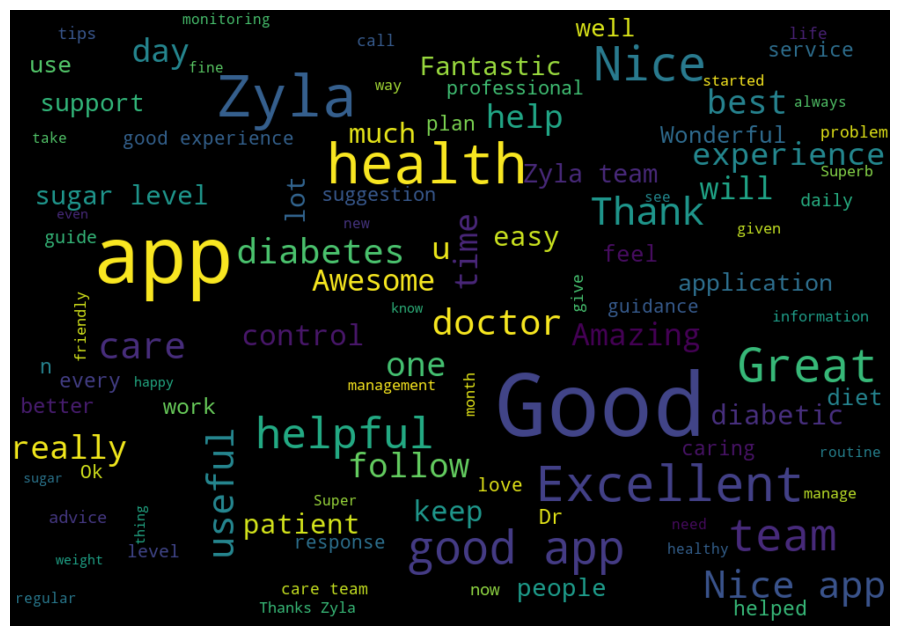

In [40]:
txt = ' '.join(rev for rev in df_reviews.content)

plt.figure(figsize = (15,8))

wc = WordCloud(
    background_color = 'black',
    max_font_size = 100,
    max_words = 100,
    width = 1000,
    height = 700).generate(txt)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()


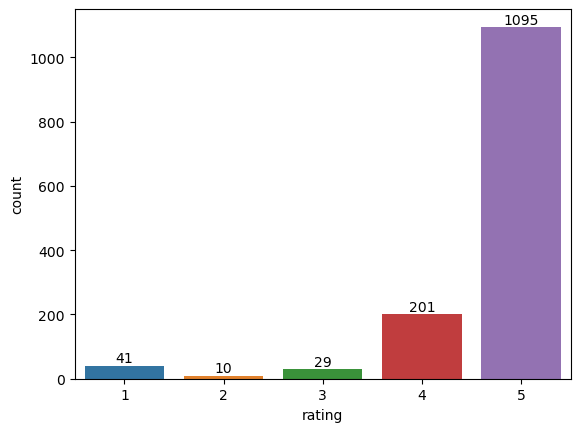

In [41]:
ax = sns.countplot(x = 'rating', data = df_reviews)
# Add values inside bars
for label in ax.containers:
    ax.bar_label(label)
plt.show()

# Function to remove emojis

In [42]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)


In [43]:
def replace_question_with_PAD(text):
    return re.sub(r"[?]+", ' **** ' ,text)

df_reviews['content_clean'] = df_reviews.content.apply(replace_question_with_PAD)

df_reviews.head()



,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion,sentiment,rating,content_clean
0,0,cff19b15-d0b7-4364-bb1b-3b80b5d7f178,ankita Dwivedi,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe,0.999502,1,v5.0.0,30-07-2023,"We are sorry to hear about your experience with us Ms Dwivedi. We request you to please share your review in detail over care@zyla.in so that we can understand the issue and try to improve your experience with us. Our sincere intent is to serve our users with the utmost empathy and care and we will not disappoint you. Regards, Team Zyla.",31-07-2023,v5.0.0,NEGATIVE,1,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe
1,1,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.,0.998924,1,v5.0.0,09-07-2023,"Thank you so much for your kind and encouraging words Mr. Batra, The entire Zyla team is happy that we are able to motivate and guide you to follow a healthy lifestyle and bring a positive change in your health. We promise to keep enhancing your experience with us by sharing real-time guidance over diet, exercise & medication. Regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.
2,2,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,Very good app. Very good team who is always there to support,0.998908,0,v5.0.0,08-07-2023,"Thank you so much for the kind words, Mr. Mahapatra, I hope our real-time and easy-to-follow guidance are helping you take better care of your health. We assure to keep providing you high quality medical guidance and personalized assistance over nutrition and exercise to boost your health further. Keep supporting us. Warm regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5,Very good app. Very good team who is always there to support
3,3,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.,0.998922,0,v5.0.0,05-07-2023,"Dear Mr. Mishra, we are pleased to hear that you are satisfied with the care provided by the Zyla team. Happy to know that our health management app is useful in keeping better track of your mother's health. We will ensure real-time and personalized assistance on diet and exercise to bring a positive change in her health. Warm regards, Team Zyla :)",06-07-2023,v5.0.0,POSITIVE,5,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.
4,4,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,It's a delightful experience.. didn't know tele medicine would be such fun.,0.998867,0,v4.4.2,31-05-2023,"Dear Mr. Darne, thank you for your kind words, we are glad that you are benefitting from our AI-empowered health management app. Our team is available for you 24 x 7 to work on your health and give you the most personalized and real-time guidance so that we can achieve great health outcomes together. Warm Regards, Team Zyla :)",17-06-2023,v4.4.2,POSITIVE,5,It's a delightful experience.. didn't know tele medicine would be such fun.


# function to unify whitespaces


In [44]:
def unify_whitespaces(text):
    cleaned_string = re.sub(' +', ' ', text )
    return cleaned_string


# function to remove punctuation


In [45]:
def remove_punctuation(text):
    result = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',',') )
    return result

In [46]:
df_reviews.head()

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion,sentiment,rating,content_clean
0,0,cff19b15-d0b7-4364-bb1b-3b80b5d7f178,ankita Dwivedi,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe,0.999502,1,v5.0.0,30-07-2023,"We are sorry to hear about your experience with us Ms Dwivedi. We request you to please share your review in detail over care@zyla.in so that we can understand the issue and try to improve your experience with us. Our sincere intent is to serve our users with the utmost empathy and care and we will not disappoint you. Regards, Team Zyla.",31-07-2023,v5.0.0,NEGATIVE,1,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe
1,1,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.,0.998924,1,v5.0.0,09-07-2023,"Thank you so much for your kind and encouraging words Mr. Batra, The entire Zyla team is happy that we are able to motivate and guide you to follow a healthy lifestyle and bring a positive change in your health. We promise to keep enhancing your experience with us by sharing real-time guidance over diet, exercise & medication. Regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.
2,2,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,Very good app. Very good team who is always there to support,0.998908,0,v5.0.0,08-07-2023,"Thank you so much for the kind words, Mr. Mahapatra, I hope our real-time and easy-to-follow guidance are helping you take better care of your health. We assure to keep providing you high quality medical guidance and personalized assistance over nutrition and exercise to boost your health further. Keep supporting us. Warm regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5,Very good app. Very good team who is always there to support
3,3,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.,0.998922,0,v5.0.0,05-07-2023,"Dear Mr. Mishra, we are pleased to hear that you are satisfied with the care provided by the Zyla team. Happy to know that our health management app is useful in keeping better track of your mother's health. We will ensure real-time and personalized assistance on diet and exercise to bring a positive change in her health. Warm regards, Team Zyla :)",06-07-2023,v5.0.0,POSITIVE,5,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.
4,4,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,It's a delightful experience.. didn't know tele medicine would be such fun.,0.998867,0,v4.4.2,31-05-2023,"Dear Mr. Darne, thank you for your kind words, we are glad that you are benefitting from our AI-empowered health management app. Our team is available for you 24 x 7 to work on your health and give you the most personalized and real-time guidance so that we can achieve great health outcomes together. Warm Regards, Team Zyla :)",17-06-2023,v4.4.2,POSITIVE,5,It's a delightful experience.. didn't know tele medicine would be such fun.


In [47]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def Stemming(text):
    stem = []
    stopword = stopwords.words('english')
    snowball_stemmer = SnowballStemmer('english')
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [ snowball_stemmer.stem(word) for word in word_tokens ]
    stem = ' '.join(stemmed_word)
    return stem


In [48]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Applying all the cleaning util methods


In [49]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [50]:
from nltk.tokenize import word_tokenize


In [51]:
def cleaning(df, content):
    df_processed = df.copy()
    df_processed[content] = df_processed['content']
    #df_processed[content] = df_processed[content].apply(clean)
    df_processed[content] = df_processed[content].apply(deEmojify)
    df_processed[content] = df_processed[content].apply(replace_question_with_PAD)
    #df_processed[content] = df_processed[content].apply(remove_num)
    df_processed[content] = df_processed[content].apply(remove_punctuation)
    df_processed[content] = df_processed[content].apply(remove_stopwords)
    df_processed[content] = df_processed[content].apply(unify_whitespaces)
    df_processed[content] = df_processed[content].apply(Stemming)
    return df_processed


In [52]:
df_processed = cleaning(df_reviews,'content')


df_reviews.head()


,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion,sentiment,rating,content_clean
0,0,cff19b15-d0b7-4364-bb1b-3b80b5d7f178,ankita Dwivedi,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe,0.999502,1,v5.0.0,30-07-2023,"We are sorry to hear about your experience with us Ms Dwivedi. We request you to please share your review in detail over care@zyla.in so that we can understand the issue and try to improve your experience with us. Our sincere intent is to serve our users with the utmost empathy and care and we will not disappoint you. Regards, Team Zyla.",31-07-2023,v5.0.0,NEGATIVE,1,I tried this app for 1 whole year and guess what.. i ended up gaining 5 more kg than the starting weight. There is no proper guidance and dietician Do not subscribe
1,1,c814487d-2d0a-4f2a-91de-371e5ed8366a,anupam batra,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.,0.998924,1,v5.0.0,09-07-2023,"Thank you so much for your kind and encouraging words Mr. Batra, The entire Zyla team is happy that we are able to motivate and guide you to follow a healthy lifestyle and bring a positive change in your health. We promise to keep enhancing your experience with us by sharing real-time guidance over diet, exercise & medication. Regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5,Zyla helped me a lot in my overall health and happiness.I have tried many more methods but zyla team is unique and very helpful.
2,2,179ec9c0-6dce-4391-b201-b39347eaf1d7,Sudhansu Sekhar Mahapatra,Very good app. Very good team who is always there to support,0.998908,0,v5.0.0,08-07-2023,"Thank you so much for the kind words, Mr. Mahapatra, I hope our real-time and easy-to-follow guidance are helping you take better care of your health. We assure to keep providing you high quality medical guidance and personalized assistance over nutrition and exercise to boost your health further. Keep supporting us. Warm regards, Team Zyla :)",23-07-2023,v5.0.0,POSITIVE,5,Very good app. Very good team who is always there to support
3,3,c00da56f-b059-4171-9733-092aec8e6944,Tatsat Mishra,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.,0.998922,0,v5.0.0,05-07-2023,"Dear Mr. Mishra, we are pleased to hear that you are satisfied with the care provided by the Zyla team. Happy to know that our health management app is useful in keeping better track of your mother's health. We will ensure real-time and personalized assistance on diet and exercise to bring a positive change in her health. Warm regards, Team Zyla :)",06-07-2023,v5.0.0,POSITIVE,5,It is an excellent app which I used for my mother to track and manage her blood pressure. App really helped a lot in vitals tracking and provided easy and effective insights to manage her BP. Team was very efficient and empathetic during her journey. Great Experience overall.
4,4,6c135d1d-8fbc-4961-8e20-d0538ef0de10,Jitendra Darne,It's a delightful experience.. didn't know tele medicine would be such fun.,0.998867,0,v4.4.2,31-05-2023,"Dear Mr. Darne, thank you for your kind words, we are glad that you are benefitting from our AI-empowered health management app. Our team is available for you 24 x 7 to work on your health and give you the most personalized and real-time guidance so that we can achieve great health outcomes together. Warm Regards, Team Zyla :)",17-06-2023,v4.4.2,POSITIVE,5,It's a delightful experience.. didn't know tele medicine would be such fun.


In [53]:

neg_reviews = df_processed[df_processed.rating == 1]

all_intents = neg_reviews.content.tolist()

print(neg_reviews.shape)

(41, 14)


In [54]:
all_sents = []

for intent in all_intents:
    for sent in nltk.sent_tokenize(intent):
        if len(sent.split()) > 4:
            all_sents.append(sent)

print(len(all_sents))

all_intents = all_sents


26


#  Sentence Embedding


In [55]:
pip install sentence-transformers


In [56]:
pip install tensorflow


  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.2.1 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.6.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [57]:
from sentence_transformers import SentenceTransformer , util
import tensorflow as tf


In [58]:
def embed(model, model_type, sentences ):
    if model_type == 'use':
        embeddings  = model(sentences)
    elif model_type == 'sentence transformer':
        embeddings = model.encode(sentences)
        
    return embeddings


In [59]:
model_st1 = SentenceTransformer('all-mpnet-base-v2', device='cpu' )

embeddings_st1 = embed(model_st1, 'sentence transformer', all_intents )


embeddings_st1.shape


(26, 768)

# Find the IDF (inverse document frequency) of every word


In [60]:
!pip install spacy


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.



  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


In [61]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 5.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [62]:
pip install --upgrade typing-extensions


In [63]:
from typing_extensions import TypeAliasType

In [64]:
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple is looking at buying U.K. startup for $1 billion
Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [65]:
from collections import Counter

sent_with_word_lemma = []

for intent in all_intents:
    doc = nlp(intent)
    temp_sentence = ""
    this_one = False
    for token in doc:
        if (token.pos_ in ['VERB', 'NOUN', 'ADJ'] or (token.dep_ == 'dobj' ) ):
            temp_sentence += token.lemma_.lower() + " "
    sent_with_word_lemma.append(temp_sentence)
    

In [66]:
def compute_IDF(documents):
    word_count = Counter()
    for doc in documents:
        if 'drops(players)' in doc:
            print(doc)
        word_set = set(doc.split())
        word_count.update(word_set)
    # print(word_count)
    total = sum(word_count.values())
    word_IDF = {k : round(( np.log2(total / v ) )) for k, v in word_count.items() }
    return word_IDF

word_IDF = compute_IDF(sent_with_word_lemma)
word_IDF
        

{'guidanc': 7,
 'year': 8,
 'kg': 8,
 'gain': 8,
 'subscrib': 8,
 'dietician': 8,
 'end': 8,
 'whole': 8,
 'weight': 8,
 'start': 6,
 'guess': 8,
 'proper': 7,
 'custom': 7,
 'thing': 6,
 'pathet': 8,
 'differ': 8,
 'award': 8,
 'app': 5,
 'assess': 8,
 'support': 8,
 'turn': 8,
 'zyla': 8,
 'abhi': 8,
 'partnership': 8,
 'ecosystem': 8,
 'bad': 6,
 'useless': 6,
 'mediassist': 8,
 'think': 8,
 'perhap': 8,
 'feedback': 8,
 'see': 8,
 'review': 8,
 'go': 6,
 'nuisanc': 8,
 'posit': 8,
 'rate': 8,
 'total': 7,
 'fraud': 8,
 'product': 8,
 'suitabl': 8,
 'sure': 7,
 'recommend': 8,
 'use': 5,
 'horribl': 8,
 'anyon': 8,
 'time': 6,
 'definit': 8,
 'gupta': 8,
 'happi': 8,
 'pick': 8,
 'altern': 8,
 'am': 8,
 'today': 8,
 'appoint': 8,
 'option': 7,
 'sampl': 8,
 '7': 8,
 'direct': 8,
 'link': 8,
 'initi': 8,
 'doctor': 7,
 'ask': 6,
 'prescript': 8,
 'get': 6,
 'instal': 7,
 'call': 6,
 'open': 6,
 'datum': 8,
 'wast': 6,
 'user': 8,
 'friend': 8,
 'complic': 7,
 'understand': 8,
 'u': 8